# Loading Libraries

# Bagging and RandomForest Diabetes classification


#Bagging is a  also known as bootstrap aggregation. it is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.

# Applications of Bagging

## HEALTH CARE
## IT
## FINANCE


# Benefits of bagging

##Ease of implementation: Python libraries such as scikit-learn (also known as sklearn) make it easy to combine the predictions of base learners or estimators to improve model performance. 

##Reduction of variance: Bagging can reduce the variance within a learning algorithm. This is particularly helpful with high-dimensional data, where missing values can lead to higher variance, making it more prone to overfitting and preventing accurate generalization to new datasets.

# Importing Library


In [1]:
## Import packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

# Loading Dataset

In [2]:
#Importing Dataset
data = pd.read_csv('../input/diabetes-data-set/diabetes.csv')


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking for Null Values or Missing Values


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.shape

(768, 9)

In [9]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Visulization Dataset

<AxesSubplot:>

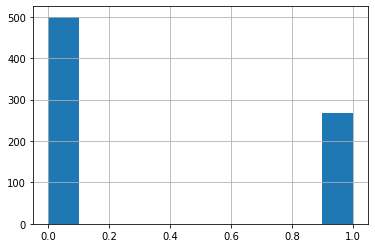

In [10]:
data.Outcome.hist()

In [11]:
import plotly.graph_objects as go

labels = ['Non-Diabetes','Diabetes']
fig = go.Figure(data=[go.Pie(labels=labels, values=data.Outcome.value_counts())])
fig.show()

In [12]:
import plotly.graph_objects as go

labels = ['Non-Diabetes','Diabetes']
fig = go.Figure([go.Bar(x=labels, y=data.Outcome.value_counts())])
fig.show()

In [13]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [14]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data.Pregnancies.value_counts().index, y=data.Pregnancies.value_counts())])
fig.update_layout(title_text='Pregnancies')
fig.show()

In [15]:
fig = go.Figure([go.Bar(x=data.Glucose .value_counts().index, y=data.Glucose .value_counts())])
fig.update_layout(title_text='Overall Glucose  level')
fig.show()

In [16]:

fig = go.Figure([go.Bar(x=data.BloodPressure.value_counts().index, y=data.BloodPressure.value_counts())])
fig.update_layout(title_text='Overall BloodPressure  level')
fig.show()

In [17]:

fig = go.Figure([go.Bar(x=data.Age.value_counts().index, y=data.Age.value_counts())])
fig.update_layout(title_text='Age')
fig.show()

In [18]:

fig = go.Figure([go.Bar(x=data.BMI.value_counts().index, y=data.BMI.value_counts(),marker_color='crimson')])
fig.update_layout(title_text='BMI')
fig.show()

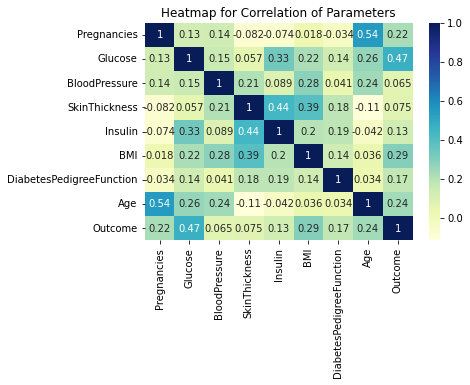

In [19]:
corr = data[data.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.title('Heatmap for Correlation of Parameters')
sns.set(rc={'figure.figsize':(30,30)})
plt.show()

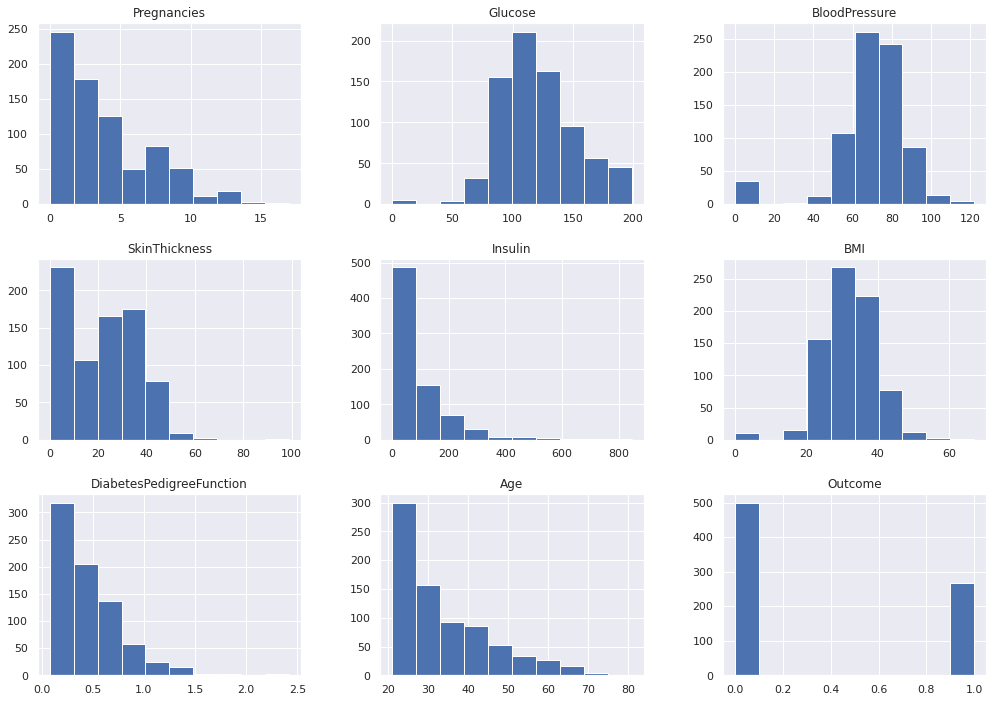

In [20]:
data.hist(figsize=(17,12))
plt.show()

# Spliting data into training and testing

In [21]:
X=data.drop(['Outcome'],axis=1)
y=data.Outcome

In [22]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [25]:
X_train.shape

(614, 8)

In [26]:
y_train.shape

(614,)

In [27]:
X_test.shape

(154, 8)

In [28]:
y_test.shape

(154,)

# Model Building

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

## Decision Tree bagger
bagger1 = BaggingClassifier(n_estimators = 50, random_state = 0)
bagger1.fit(X_train, y_train)

## Naive Bayes bagger
bagger2 = BaggingClassifier(base_estimator = GaussianNB(), random_state = 0)
bagger2.fit(X_train, y_train)

## Evaluate
print(np.mean(bagger1.predict(X_test) == y_test))
print(np.mean(bagger2.predict(X_test) == y_test))

0.7467532467532467
0.7597402597402597


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
rf_prediction=rf.predict(X_test)
print('Accuracy',np.mean(rf.predict(X_test) == y_test)*100)

Accuracy 76.62337662337663


In [31]:
c=confusion_matrix(y_test,rf_prediction)
a=accuracy_score(y_test,rf_prediction)
p=precision_score(y_test,rf_prediction)
r=recall_score(y_test,rf_prediction)

In [32]:
print('Confusion Matrix:\n',c)

Confusion Matrix:
 [[81 18]
 [18 37]]


In [33]:
print('Accuracy:',a*100)


Accuracy: 76.62337662337663


In [34]:
print('Recall:',r*100)

Recall: 67.27272727272727


In [35]:
print('Precision:',p*100)


Precision: 67.27272727272727


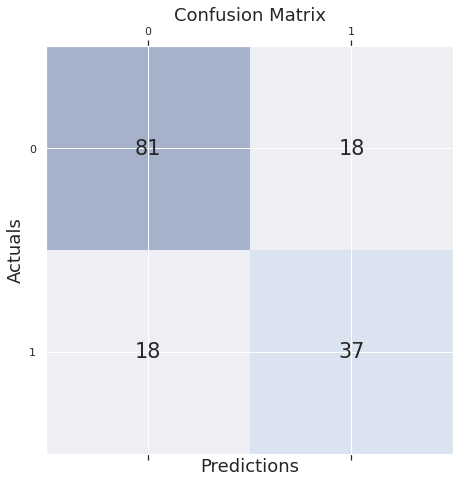

In [36]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()